In [1]:
from tqdm import tqdm
import os
from PIL import Image
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error, normalized_root_mse


In [4]:
file_names = os.listdir('/home/mist/low-light/test_datasets/NPE/res/wformer')
file_names.sort()
for name in tqdm(file_names) :
  # print(name)
  source_input_path = '/home/mist/low-light/test_datasets/NPE/res'
  plt.figure(figsize=(18,8)) #设置窗口大小
  i=1
  for dirname in ['input','gan','kind','mbllen','wformer','zero']:
    file_path = os.path.join(source_input_path, dirname+'/'+name)
    im1 = cv2.imread(file_path)
    im= im1.copy() 
    im[:,:,0] = im1[:,:,2]
    im[:,:,1] = im1[:,:,1]
    im[:,:,2] = im1[:,:,0]   #cv2读取的是bgr,转换成rgb就要做一下变通

    plt.subplot(2,3,i), plt.title(dirname)
    plt.imshow(im), plt.axis('off')
    i=i+1
  # plt.show() 
  plt.savefig('./plts/npe/'+name)
  # break

  

  

 27%|██▋       | 20/73 [00:16<00:44,  1.20it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
 84%|████████▎ | 61/73 [00:47<00:10,  1.18it/s]

In [5]:
source_input_path = '/home/mist/low-light/senior/test/ex_final'
name = '2015_04633.png'
for dirname in tqdm(os.listdir(source_input_path)):
  file_path = os.path.join(source_input_path, dirname+'/'+name)
  im1 = cv2.imread(file_path)
  im= im1.copy() 
  im[:,:,0] = im1[:,:,2]
  im[:,:,1] = im1[:,:,1]
  im[:,:,2] = im1[:,:,0]   #cv2读取的是bgr,转换成rgb就要做一下变通


  final = Image.fromarray(np.uint8(im))
  final.save('./IinPaper-v2/'+name.split('.')[0]+'/'+dirname+name)

100%|██████████| 15/15 [00:01<00:00,  9.05it/s]


100%|██████████| 16/16 [00:01<00:00, 10.97it/s]


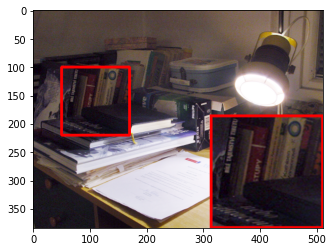

In [9]:
# 图中图 | 原图
name = 'lampicka09'
source_input_path = '/home/mist/low-light/imageInPaper/IinPaper-v2/'+name
a = 0
b = 0
c = 0
d = 0
if name == '00697':
  x=300
  y=30
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== '00699':
  x=50
  y=30
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== '00742':
  x=470
  y=50
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== '00767':
  x=100
  y=80
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== '00776':
  x=50
  y=5
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== '2015_04633':
  x=250
  y=100
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== 'Imgp6080':
  x=50
  y=100
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 
elif name== 'lampicka09':
  x=50
  y=100
  a=int(x)
  b=int(x+ 120)
  c=int(y)
  d=int(y + 120) 


for file in tqdm(os.listdir(source_input_path)):
  file_path = os.path.join(source_input_path, file)
  # print(file_path)
  im1 = cv2.imread(file_path)
  im= im1.copy() 
  im[:,:,0] = im1[:,:,2]
  im[:,:,1] = im1[:,:,1]
  im[:,:,2] = im1[:,:,0]   #cv2读取的是bgr,转换成rgb就要做一下变通
  
  cv2.rectangle(im, (a, c), (b, d), (255, 0, 0), 3)  
  
  redImg =im[c:d,a:b]
  R = Image.fromarray(np.uint8(redImg)).resize((200,200))
  
  if name== '2015_04633':
    im[224:424,440:640] = np.array(R)
  elif name== 'Imgp6080':
    im[164:364,312:512] = np.array(R)
  elif name== 'lampicka09':
    im[184:384,312:512] = np.array(R)
  else:
    im[200:400,400:600] = np.array(R)



  plt.imshow(im) 
  # break

  final = Image.fromarray(np.uint8(im))
  final.save('./IinPaper-v2-red/'+name+'/'+file)